In [96]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt

class WebScraper:
    def __init__(self, url):
        self.url = url

    def scrape_data(self):
        try:
            headers = {
                'dnt': '1',
                'upgrade-insecure-requests': '1',
                'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36',
                'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
                'sec-fetch-site': 'same-origin',
                'sec-fetch-mode': 'navigate',
                'sec-fetch-user': '?1',
                'sec-fetch-dest': 'document',
                'referer': 'https://www.ebay.com/',
                'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
            }

            response = requests.get(self.url, headers=headers)
            response.raise_for_status()

            print(response)

            soup = BeautifulSoup(response.text, 'html.parser')
            product_items = soup.find_all('li', class_='s-item')  

            #print(product_items)

            data = []
            for item in product_items:
                name_elem = item.find('h3', class_='s-item__title')
                price_elem = item.find('span', class_='s-item__price')
                reviews_elem = item.find('span', class_='b-rating__rating-count')
                
                # we check if the elements were found before accessing their text
                if name_elem and price_elem and reviews_elem:

                    # Extract the int part of the price (if valid)
                    price_match = re.search(r'(\d+(\.\d+)?)', price_elem.text.strip())
                    price = float(price_match.group(1)) if price_match else None

                    # Extract the numeric part of the review count (if valid)
                    reviews_match = re.search(r'\((\d+)\)', reviews_elem.text.strip())
                    reviews = int(reviews_match.group(1)) if reviews_match else None
    
                    data_point = {
                        'name': name_elem.text.strip(),
                        'price': price,
                        'reviews': reviews
                    }
                    data.append(data_point)
    
            if not data:
                print("No valid data to visualize.")
                return []

            print(data)
            return data

        except Exception as e:
            print(f"An error occurred: {str(e)}")
            return []


In [101]:
class DataVisualizer:
    @staticmethod
    def visualize_data(data):
        if not data:
            print("No data to visualize.")
            return

        df = pd.DataFrame(data)
        
        # Create a bar chart for price
        plt.figure(figsize=(12, 6))
        plt.bar(df['name'], df['price'])
        plt.xlabel('Product Name')
        plt.ylabel('Price')
        plt.title('Product Prices')
        plt.xticks(rotation=90)
        plt.show()

        # Create a bar chart for reviews
        plt.figure(figsize=(12, 6))
        plt.bar(df['name'], df['reviews'])
        plt.xlabel('Product Name')
        plt.ylabel('Number of Reviews')
        plt.title('Product Reviews')
        plt.xticks(rotation=90)
        plt.show()

<Response [200]>
[{'name': 'Dell Inspiron 7620 16" 3K i7-12700H 40GB 1TB SSD Dark Green', 'price': 699.0, 'reviews': 4}, {'name': 'Dell Latitude 3480 14" Core i5-7200U 2.5GHz 8GB RAM No HDD No OS', 'price': 49.99, 'reviews': 1}, {'name': 'Asus Chromebook C202 11.6” Intel 1.6 GHz 4GB RAM 16GB eMMC Bluetooth HDMI Webcam', 'price': 39.95, 'reviews': 21}, {'name': 'Dell XPS 13 9320 Plus Laptop 13.4" OLED 3.5K Touch i7 32GB Iris Xe 1TB SSD W11', 'price': 999.99, 'reviews': 1}, {'name': 'Acer Chromebook C720 11.6” Intel 1.4 GHz 4GB RAM 16GB eMMC Bluetooth HDMI Webcam', 'price': 42.95, 'reviews': 89}]


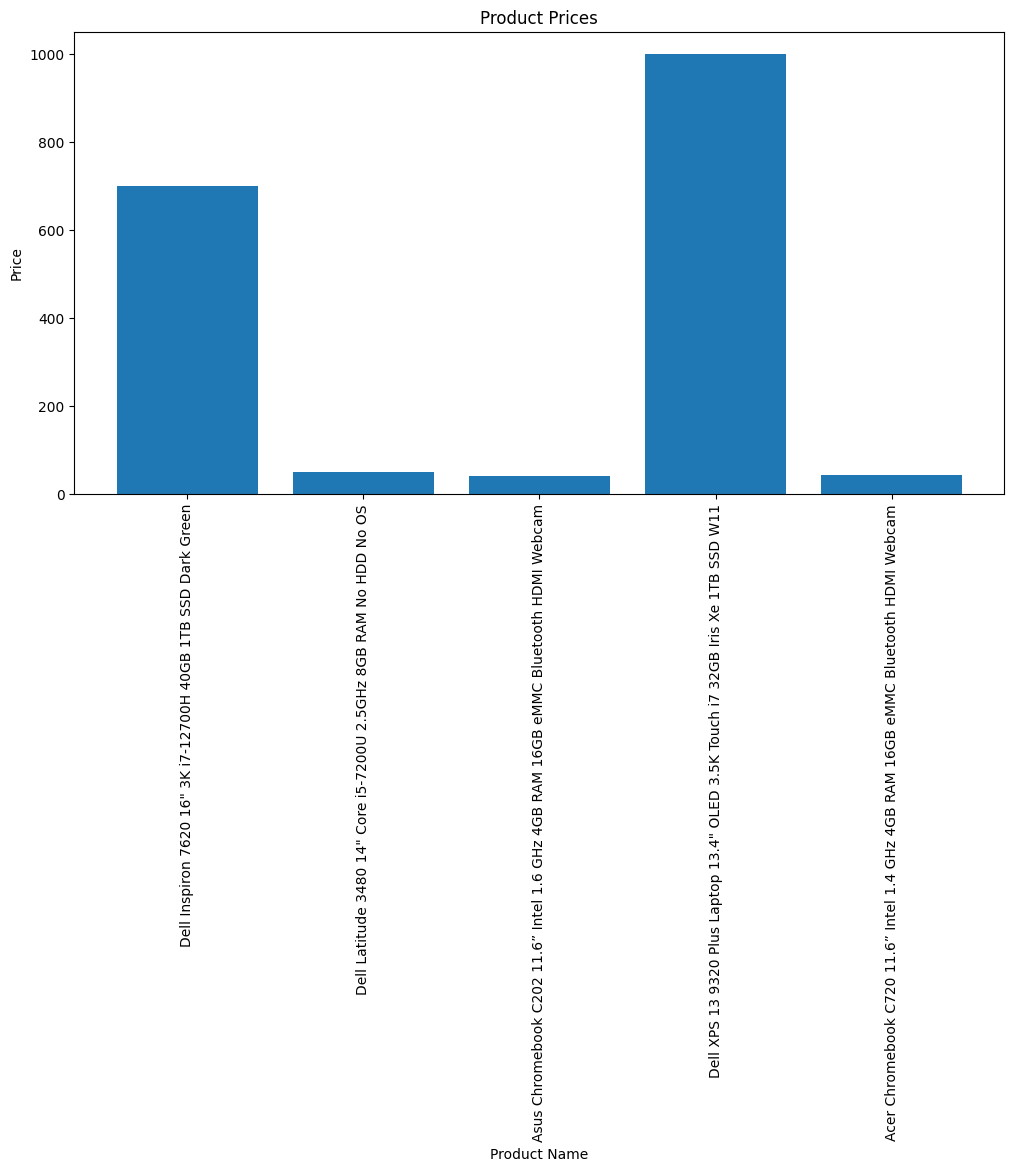

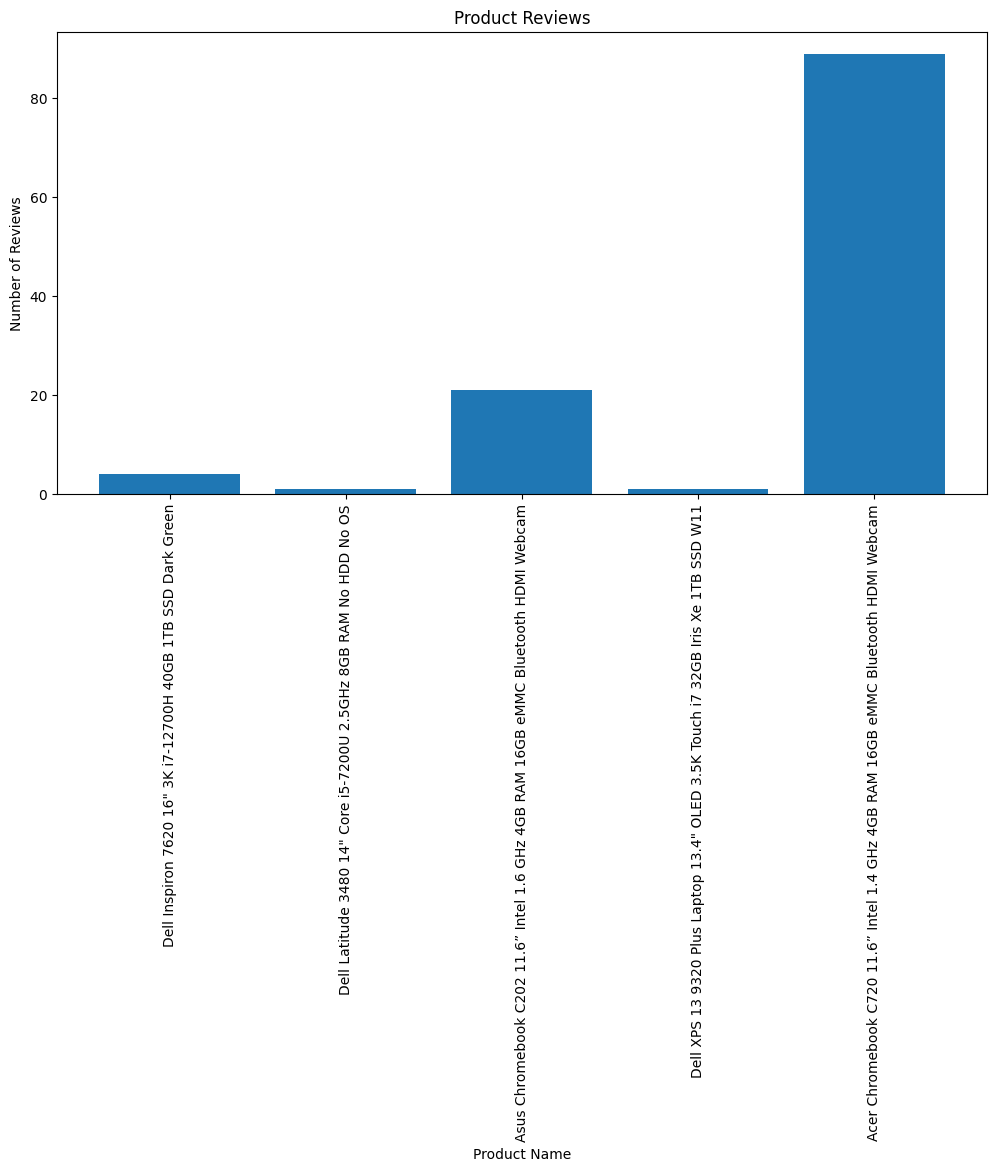

In [102]:
if __name__ == "__main__":
    url_to_scrape = 'https://www.ebay.com/b/PC-Laptops-Netbooks/177/bn_317584'
    
    web_scraper = WebScraper(url_to_scrape)
    data = web_scraper.scrape_data()

    DataVisualizer.visualize_data(data)